### Sales Prediction for Big Mart Outlets

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. **The aim is to build a predictive model and predict the sales of each product at a particular outlet.**

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 


### Exploratory Data Analysis Steps....

* Univarate Analysis - Single Variable Analysis (Num: Histograms/Distplot| Cat: Countplot or Frequency Plot)

* Bivariate Analysis/Multivariate Analysis 
    * (Num vs Target(Num): Scatterplot & also Heatmap(Correlation Plot), 
    * Cat vs Num(Target): **Boxplot**/ViolinPlot/Barplot, 
    * Cat vs Cat (Target): Crosstab/Frequency - Countplot/Heatmap

* Missing Values & Imputation - We are going to deal with the missing values...
     * If it is a Numerical Var: Use Mean/Median Imputation
     * Categorical Var - Frequency....
     * The other option is to check the patern in the data and impute the missing values accordingly
     
* Outlier Analysis & Treatment

* **Feature Engineering**

* Encoding and Scaling...Standard Scaler or Min Max Scaler for Scaling and for Categorical Encoding - One Hot Encoding, Label Encoding, Target Encoding and Frequency Encoding...


In [267]:
# Import the required libraries...

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [268]:
train = pd.read_csv('Bigmart_train.csv')
test = pd.read_csv('Bigmart_test.csv')

In [269]:
# Preview the Dataset...
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [270]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


### Univariate Analysis

In [271]:
# Combined the Dataset
combined = pd.concat([train, test], ignore_index = True)

In [272]:
train.shape, test.shape, combined.shape

((8523, 12), (5681, 11), (14204, 12))

In [273]:
# # Find all the Numerical Variables...
combined.select_dtypes(include = np.number).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [274]:
combined.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

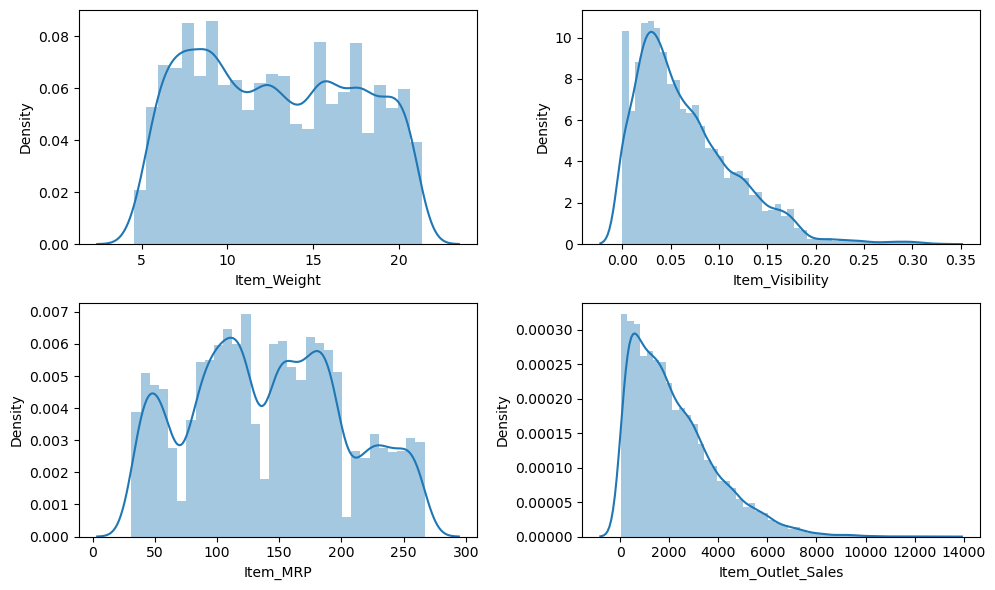

In [275]:
num_cols = ['Item_Weight', 'Item_Visibility', 
            'Item_MRP','Item_Outlet_Sales']

nrows = 2 # Number of rows in the plot
ncols = 2 # No of Columns for the plot
iterator = 1 # Plot Iterator...

import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize = (10, 6))
for i in num_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.distplot(combined.loc[:, i])
    iterator = iterator+1

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Item_Outlet_Sales'>

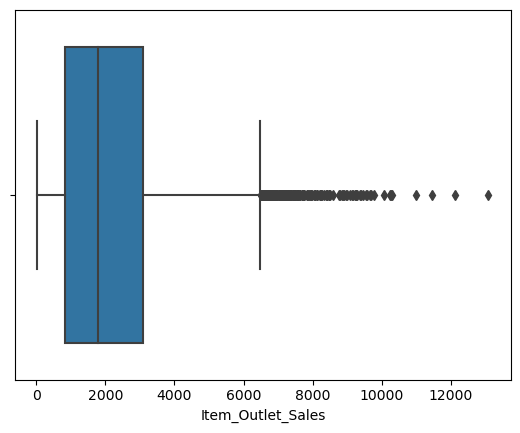

In [276]:
# Lets Analyse the Target

sns.boxplot(combined.Item_Outlet_Sales)

In [277]:
# Cat Vars...

combined.select_dtypes(include = "object").columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

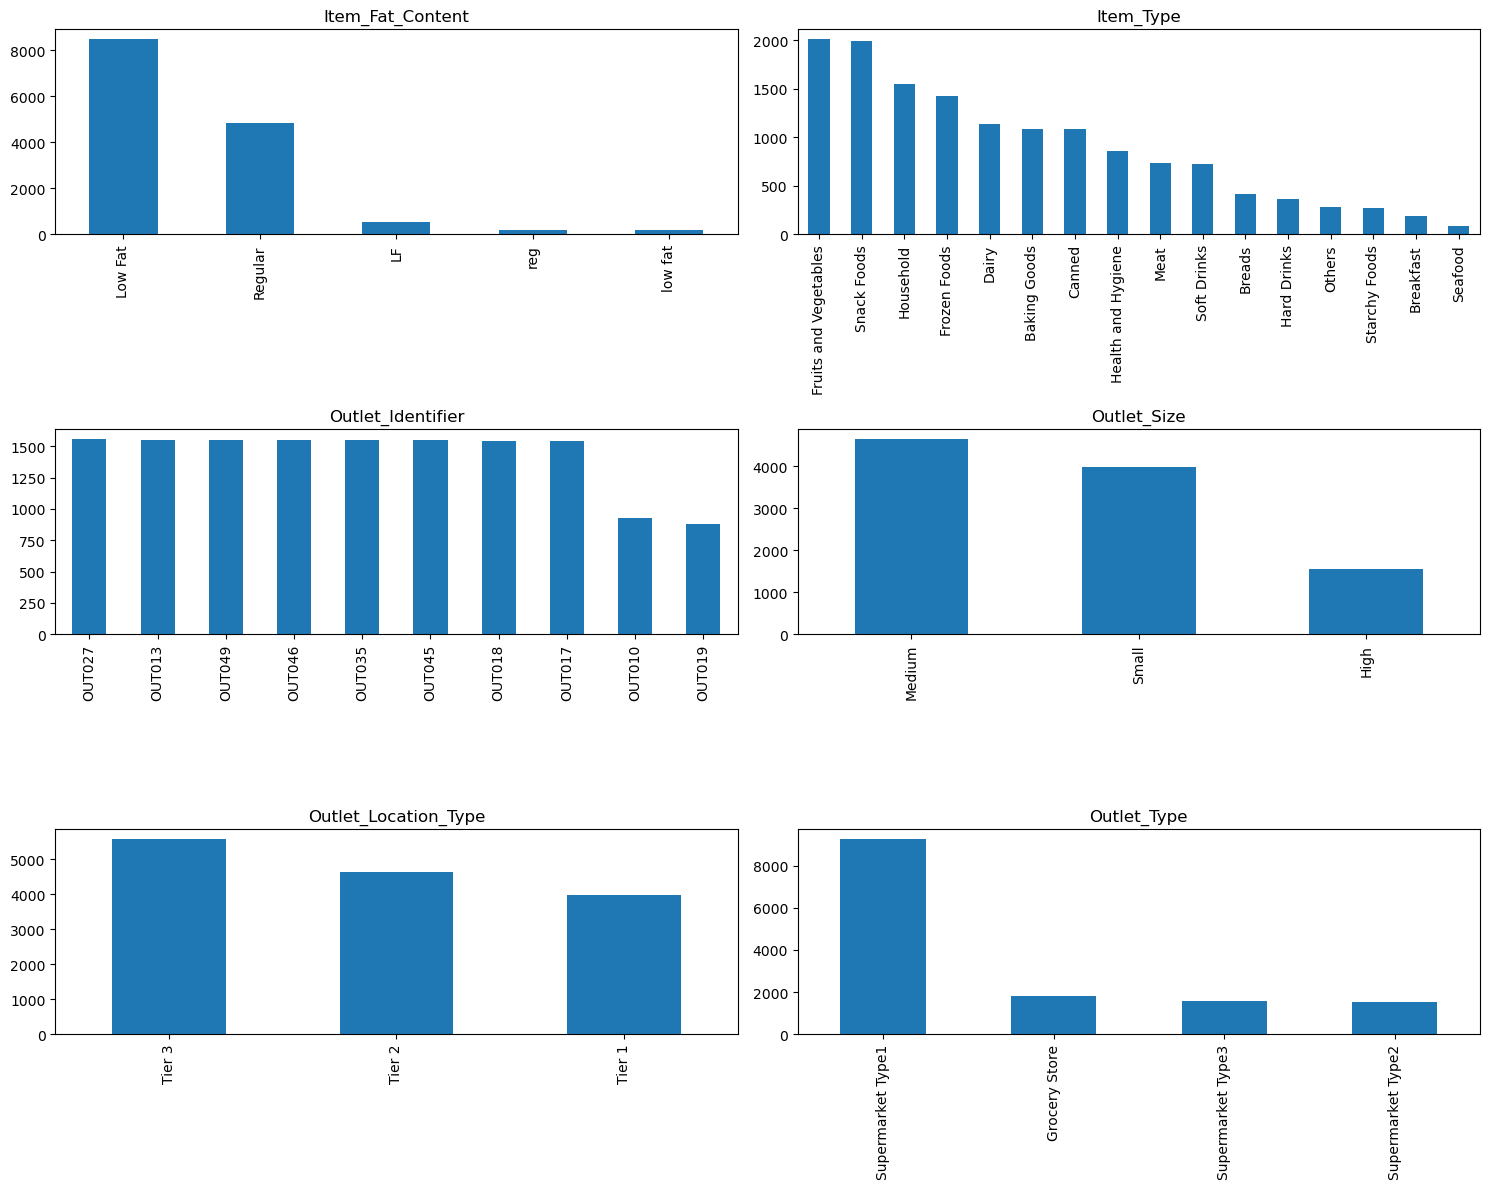

In [278]:
cat_cols = ['Item_Fat_Content', 
            'Item_Type', 'Outlet_Identifier',
            'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
nrows = 3
ncols = 2
repeater = 1

plt.figure(figsize = (15, 12))
for i in cat_cols:
    plt.subplot(nrows, ncols, repeater)
    combined.loc[:, i].value_counts().plot(kind = "bar")
    plt.title(i)
    repeater+=1
    
plt.tight_layout()
plt.show()

### Univariate Analysis Inference

* Most of the Items that are sold are **Low Fat** Items
* The Top 5 Selling Items in the Business are **Fruits & Veggies**, **Snack Foods**, **Household**, **Frozen** and **Dairy**.

* Most Seen Outlet Type is **OUT027** and the Less Frequent Outlets in the Business are **OUT010 & OUT019**.

* Most of the Outlets built by the company are **Medium** Size Outlets
* Most of the Outlets are in **Tier3** Cities followed **Tier-2** and then **Tier-1**

* Most of the Outlet Themes are **Supermarket Type 1**

In [279]:
combined.loc[combined.Outlet_Identifier=="OUT019", "Outlet_Type"].unique()

array(['Grocery Store'], dtype=object)

In [280]:
combined.Outlet_Identifier.value_counts()

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

### Bivariate Analysis

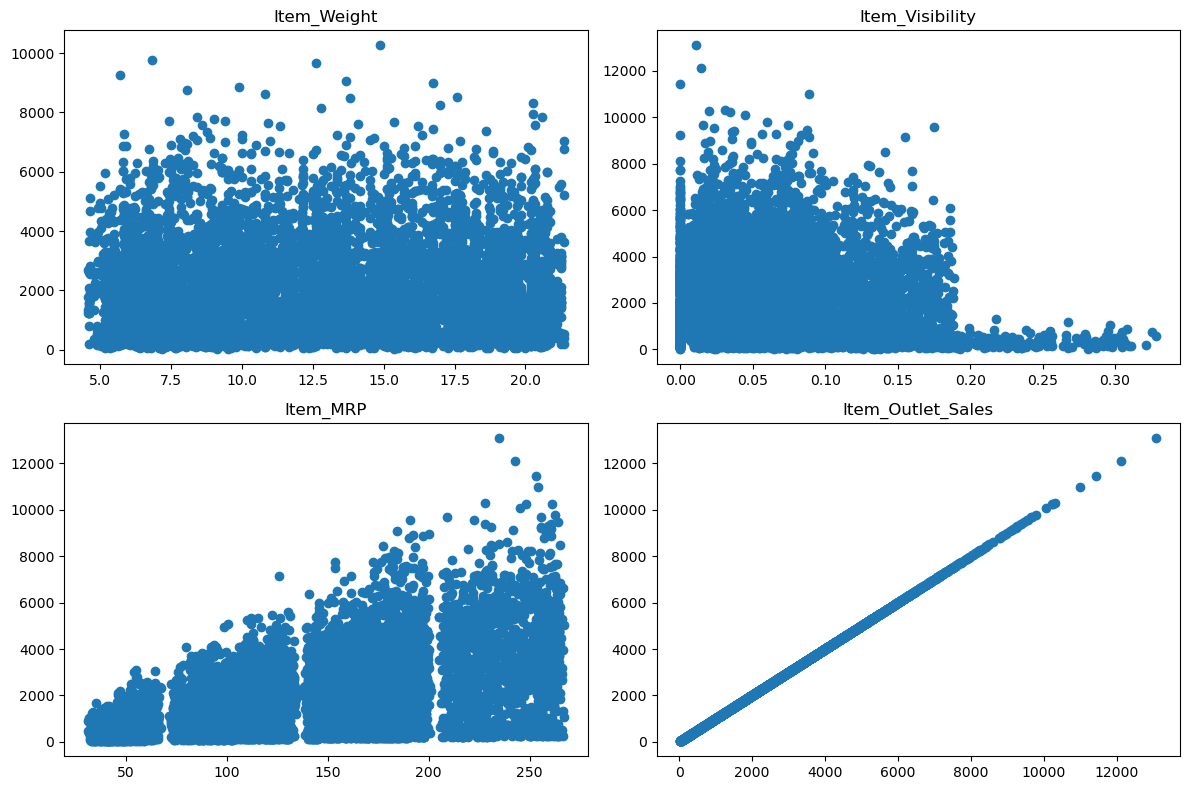

In [281]:
# Num vs Num

nrows = 2
ncols = 2
iterator = 1

plt.figure(figsize = (12, 8))
for i in num_cols:
    plt.subplot(nrows, ncols, iterator)
    plt.scatter(combined.loc[:, i], 
                    combined.Item_Outlet_Sales)
    plt.title(i)
    iterator+=1
    
plt.tight_layout()
plt.show()

In [282]:
# Fix the Item Fat Content

combined.Item_Fat_Content.replace(to_replace = ["low fat", "LF","reg"],
                                 value = ["Low Fat", "Low Fat", "Regular"],
                                 inplace = True)

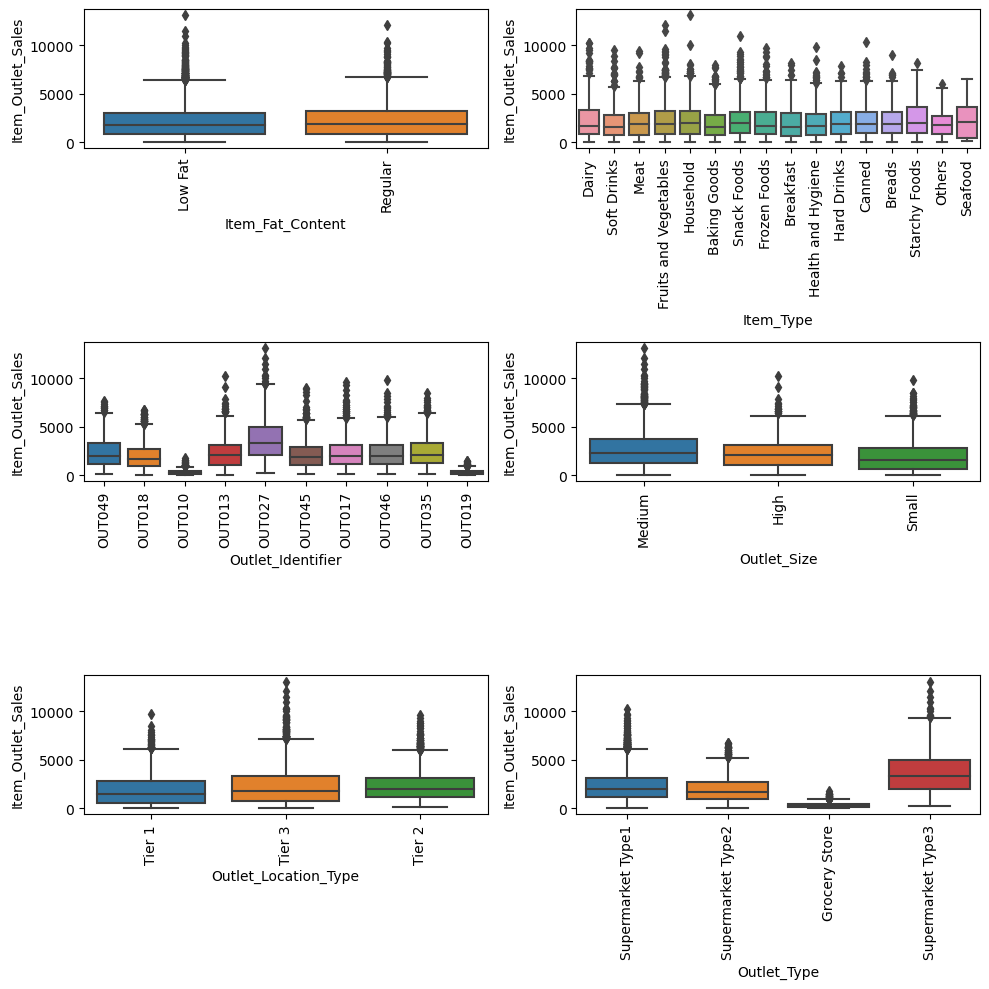

In [283]:
# Cat vs Num

nrows = 3
ncols = 2
rep = 1

plt.figure(figsize = (10, 10))
for i in cat_cols:
    plt.subplot(nrows, ncols, rep)
    sns.boxplot(data = combined, 
                x = i, y = "Item_Outlet_Sales")
    plt.xticks(rotation = 90)
    rep+=1
    
plt.tight_layout()
plt.show()

### Data Understanding

1. What is the Average Sales
2. What is the 95% values of Sales.
3. Identify the Product that sells the Most
4. Find the Middle most observation for the MRP
5. Compare the Mean and Trimmed Mean of Sales
6. What percentage of Dairy Items are in the Data.
7. Which Product as the highest variation in Sales
8. What is the Range of Middle 50% of ITEM MRP
9. Are there any variables that should be excluded from the Model Building
10. Find Percentage of Variation in Item Weight for each Product
11. Is there any variable that is Normally Distributed
12. Identify the most visible Outlet Type for the Business
13. Do we have negatively skewed feature/Column in the Dataset
14. Find the Kurtosis of all the variables.
15. Identify the Presence of Extreme Values in the Dataset
16. Is there any effect of MRP on the Price?
17. Transform Item Outlet Sales such that the Mean is 0 and Standard Deviation is 1 
18. Transform the Sales in such a way that the range is 1
19. Check Skewness of Item Outlet Sales and find out how to reduce the skewness

In [284]:
# What is the Average Sales
print("Mean Sales: ", combined.Item_Outlet_Sales.mean())

# What is the 95% values of Sales.
print("95% Sales Values:", combined.Item_Outlet_Sales.quantile(0.95))

Mean Sales:  2181.2889135750365
95% Sales Values: 5522.811


In [285]:
# Identify the Product that sells the Most

combined.Item_Type.mode()[0]

'Fruits and Vegetables'

In [286]:
# Find the Middle most observation for the MRP

combined.Item_MRP.median()

142.247

In [287]:
# Compare the Mean and Trimmed Mean of Sales
print("mean:", combined.Item_Outlet_Sales.mean())

import scipy.stats as stats # Statistical Library....
trimmed_mean = stats.trim_mean(train.Item_Outlet_Sales, 
                               proportiontocut=0.01)

print("Trimmed Mean",trimmed_mean)

# What percentage of Dairy Items are in the Data.
print((combined.loc[combined.Item_Type=="Dairy"].shape[0]/combined.shape[0])*100)

mean: 2181.2889135750365
Trimmed Mean 2138.3762353405964
7.997747113489158


In [288]:
# Which Product as the highest variation in Sales
print(combined.groupby("Item_Type")["Item_Outlet_Sales"].std())

# What is the Range of Middle 50% of ITEM MRP
q3 = combined.Item_MRP.quantile(0.75)
q1 = combined.Item_MRP.quantile(0.25)
print("IQR RANGE: ", q3-q1)

Item_Type
Baking Goods             1546.788045
Breads                   1644.235914
Breakfast                1911.693586
Canned                   1645.235638
Dairy                    1884.404698
Frozen Foods             1724.777720
Fruits and Vegetables    1799.503459
Hard Drinks              1606.191587
Health and Hygiene       1553.633063
Household                1692.245757
Meat                     1695.231081
Others                   1431.860471
Seafood                  1842.988719
Snack Foods              1705.121755
Soft Drinks              1674.249752
Starchy Foods            1773.945328
Name: Item_Outlet_Sales, dtype: float64
IQR RANGE:  91.84360000000001


In [289]:
# # Find Percentage of Variation in Item Weight for each Product

combined.groupby("Item_Type")["Item_Weight"].std()

Item_Type
Baking Goods             4.744906
Breads                   4.632099
Breakfast                5.217283
Canned                   4.625382
Dairy                    4.662724
Frozen Foods             4.512750
Fruits and Vegetables    4.567869
Hard Drinks              4.229816
Health and Hygiene       4.551038
Household                4.977586
Meat                     4.650424
Others                   4.117886
Seafood                  5.273337
Snack Foods              4.547307
Soft Drinks              4.408126
Starchy Foods            4.231526
Name: Item_Weight, dtype: float64

In [290]:
for i in combined.Item_Type.unique():
    mean_=  combined.loc[combined.Item_Type==i, "Item_Weight"].mean()
    std_ = combined.loc[combined.Item_Type==i, "Item_Weight"].std()
    print("CV for", i,std_/mean_)

CV for Dairy 0.3522131559667388
CV for Soft Drinks 0.3739373755063583
CV for Meat 0.36427904399146166
CV for Fruits and Vegetables 0.34619738596516203
CV for Household 0.37318900890557427
CV for Baking Goods 0.38654370213844974
CV for Snack Foods 0.35344333082714907
CV for Frozen Foods 0.35902889490246304
CV for Breakfast 0.3958751726877388
CV for Health and Hygiene 0.34551534644867415
CV for Hard Drinks 0.36538886491627387
CV for Canned 0.37480312491089857
CV for Breads 0.41534694108394005
CV for Starchy Foods 0.30978044214220474
CV for Others 0.29591605049643105
CV for Seafood 0.4132620732230003


### Scaling

* Standard Scaler

Standard Scaler is one of the popular techniques used for Scaling in the Data Science Fraternity. It involves calculating the mean & std of all the numerical columns and then using **Z score to convert the data into Standard Normal Distribution where the Mean of all the Columns is equal to 0 and Standard Deviation is 1.**

### Normalization

* It is another technique used to scale the data in such a way where the Min of each Column is Equal to 0 and the Max of each column is equal to 1.

* Since, it takes the range in denominator, thus, it is very much influenced by the presence of the Outliers in the data. Therefore Min Max Scaler is not a very effective technique in scaling the data.

Note: Standard Scaler is quite versatile in nature as it can handle the presence of Outliers well. 

Note2: However, in the presence of outliers in the data, one must apply **ROBUST SCALER** to scale the data.

In [291]:
train.loc[:, num_cols].describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.643456,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,8.773750,0.026989,93.826500,834.247400
50%,12.600000,0.053931,143.012800,1794.331000
75%,16.850000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


In [292]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

sc = StandardScaler() # Machine Instance 

In [293]:
# Scale the Data....
# sc = (xi-mean)/sd

# .fit() will only learn the mean & std
# .fit_transform() will not only learn the mean & std but also convert

scaled = sc.fit_transform(pd.DataFrame(combined.Item_MRP))

# Note: sc takes data in 2D format and hence, 
# I need to supply the DataFrame

In [294]:
print(pd.DataFrame(scaled, columns=["ZScore"]).mean())
print(pd.DataFrame(scaled, columns=["ZScore"]).std())

ZScore   -1.391374e-16
dtype: float64
ZScore    1.000035
dtype: float64


In [295]:
# Apply Standard Scaler on the Whole Data

sc = StandardScaler()

scaled = sc.fit_transform(combined.loc[:, num_cols])

In [296]:
pd.DataFrame(scaled, columns = num_cols).describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,1.176500e+04,1.420400e+04,1.420400e+04,8.523000e+03
mean,-2.569602e-16,-4.775741e-17,-1.391374e-16,1.631662e-16
std,1.000043e+00,1.000035e+00,1.000035e+00,1.000059e+00
min,-1.770704e+00,-1.281712e+00,-1.767181e+00,-1.258790e+00
25%,-8.775982e-01,-7.563065e-01,-7.569166e-01,-7.894057e-01
50%,-4.145348e-02,-2.318886e-01,2.000528e-02,-2.267687e-01
75%,8.505775e-01,5.457876e-01,7.224096e-01,5.391513e-01
max,1.839335e+00,5.100167e+00,2.027606e+00,6.391045e+00


In [297]:
# Min Max Scaler

mmax = MinMaxScaler()

In [298]:
pd.DataFrame(mmax.fit_transform(combined.loc[:, num_cols]), 
            columns = num_cols).min()

Item_Weight          0.0
Item_Visibility      0.0
Item_MRP             0.0
Item_Outlet_Sales    0.0
dtype: float64

In [299]:
def minmax(df, xi):
    return((df[xi]-min(df[xi]))/(max(df[xi])-min(df[xi])))

In [300]:
minmax(combined, "Item_MRP").describe()

count    14204.000000
mean         0.465686
std          0.263529
min          0.000000
25%          0.266224
50%          0.470958
75%          0.656055
max          1.000000
Name: Item_MRP, dtype: float64

#### Transformation

**Why Transform**

* The Purpose of Transformation is to reduce the **SKEWNESS** in the data.

* Most of the Statistical Models have an assumption about the data that it should be Normally Distributed/Gaussian Curve.

* We can apply some of the transformation techniques to reduce the skewness in the data

* Those Techniques are as follows:

    * Log Transformation
    * SQRT Transformation
    * Cube Root
    * Reciprocal
    * Box-Cox
    * Yeo-JohnSon
    * Power Transformer

1.1775306028542796


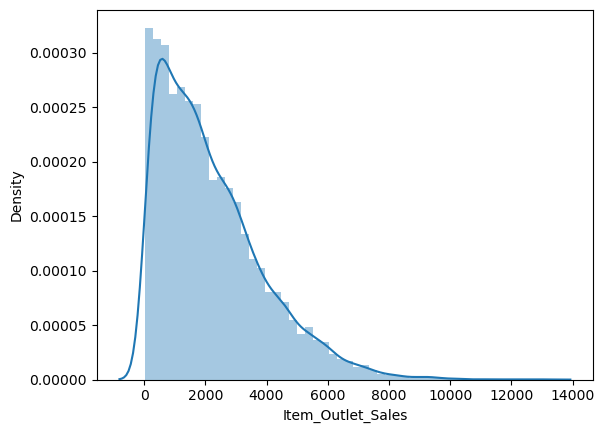

In [301]:
# Without Transformation
sns.distplot(train.Item_Outlet_Sales)
print(train.Item_Outlet_Sales.skew())

-0.887753343209305


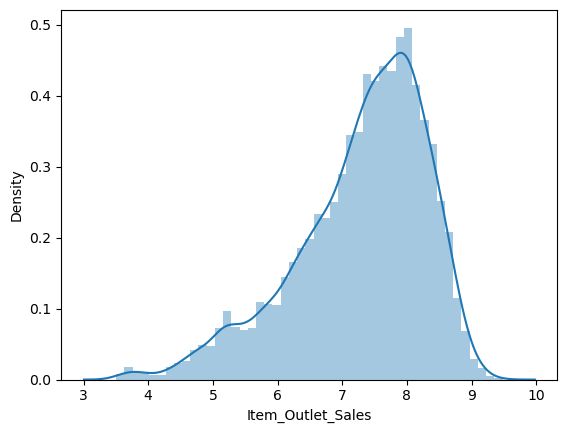

In [302]:
# Apply Log Transformation
sns.distplot(np.log(train.Item_Outlet_Sales))
print(np.log(train.Item_Outlet_Sales).skew())

1.0851408216698326


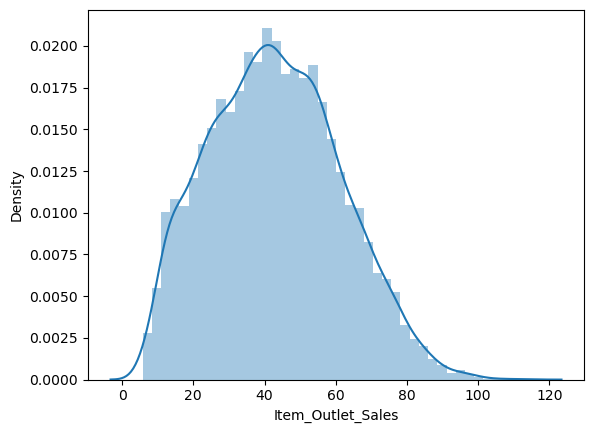

In [303]:
# Apply SQRT Transformation
sns.distplot(np.sqrt(train.Item_Outlet_Sales))
print(np.sqrt(train.Item_Outlet_Sales.skew()))

-0.10250699736722735


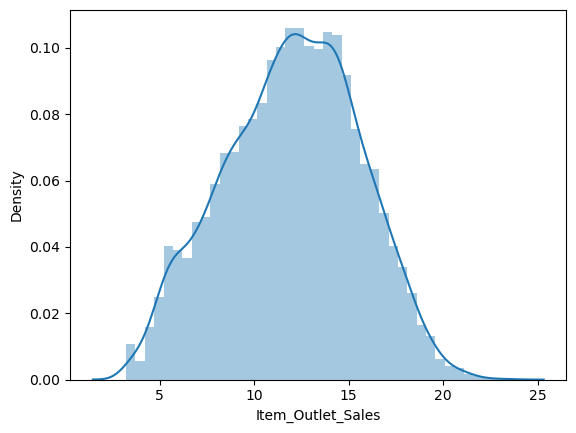

In [304]:
# Apply CUBEROOT Transformation
sns.distplot(np.cbrt(train.Item_Outlet_Sales))
print(np.cbrt(train.Item_Outlet_Sales).skew())

5.679237323396784


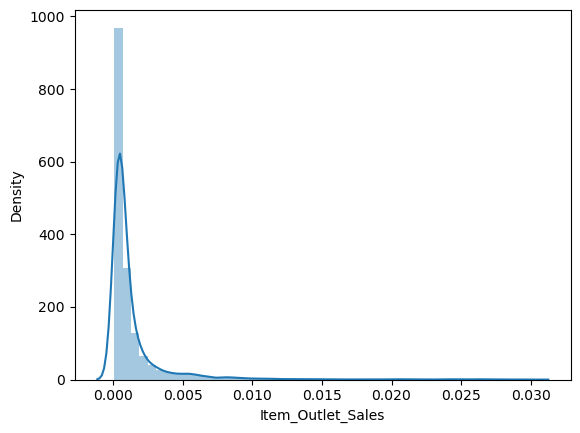

In [305]:
# Apply Recirpocal Transformation
sns.distplot(np.reciprocal(train.Item_Outlet_Sales))
print(np.reciprocal(train.Item_Outlet_Sales).skew())

### Box Cox Transformation & Yeo-Johnson Transformation

* BoxCox Transformation works on transforming the Positive Values(greater than 0) only as the function entails usage of Log Transformation as per the formula if the function encounters 0 in the data.

* Where as the YeoJohnson Function can work on any number be it 0, -ve or +ve number. In totality, the Yeo Johnson is more flexible and a versatile transformation bet on the data..

-0.0749649223767276


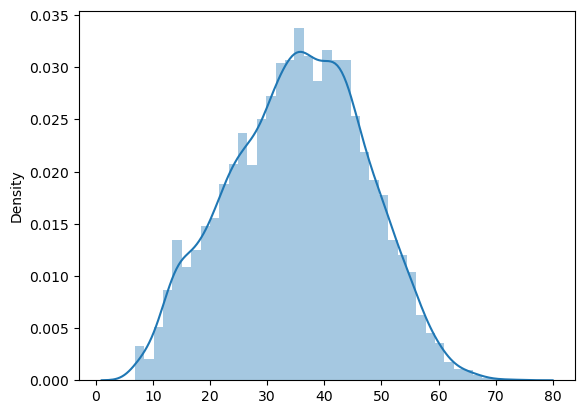

In [306]:
# use scipy.stats 

sns.distplot(stats.boxcox(train.Item_Outlet_Sales)[0])
print(stats.skew(stats.boxcox(train.Item_Outlet_Sales)[0]))

-0.07477744470274916


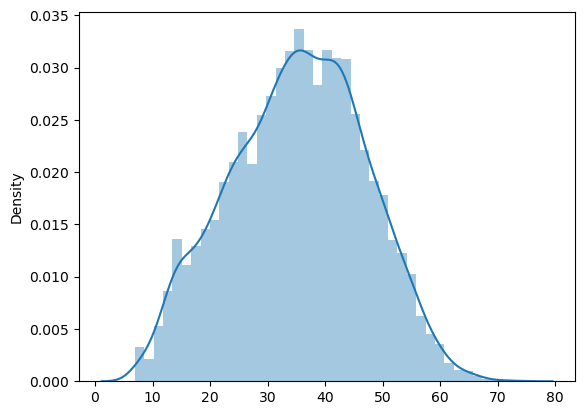

In [307]:
# use Yeo Johnson

sns.distplot(stats.yeojohnson(train.Item_Outlet_Sales)[0])
print(stats.skew(stats.yeojohnson(train.Item_Outlet_Sales)[0]))

In [308]:
stats.yeojohnson([23, 54, 98, 0, -134])

(array([ 31.07413761,  80.56195565, 157.18079953,   0.        ,
        -81.46815947]),
 1.1280463185584948)

### Missing Values

* Rule says if 95% or more data is missing in the column, then it is best to drop that column.   

Note: This is a theoretical rule. The point is to find the pattern in the data in such a way that you can handle most of the missing values in the data....

* Now, basis discussion, we see that prima facie, we can consider the mode of the categorical variable & Median in Numerical Variable to impute the missing value. 

* However, this approach might not work because we have not explore the pattern from the rest of the columns/features.

* Therefore, we need to do the pattern exploration on priority to find out the closest possible pattern for the missing value and then impute it accordingly,

* In the event of the pattern not being available or unable to mine the pattern, its always good to build the model and deal with the missing values accordingly.

In [309]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [310]:
train.shape, test.shape, combined.shape

((8523, 12), (5681, 11), (14204, 12))

In [311]:
# Outlet size is missing
combined.loc[combined.Outlet_Size.isnull(), "Outlet_Identifier"].unique()

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

In [312]:
# Find the Mode of Outlet Type
combined.Outlet_Size.mode()[0]

'Medium'

In [313]:
#  OUT10 and OUT19 has least sales that is why we are checking outlet size of OUT19
combined.loc[combined.Outlet_Identifier=="OUT019", ].head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [314]:
# Imputting the 'Small' in OUT010
combined.loc[(combined.Outlet_Identifier=="OUT010")&\
             (combined.Outlet_Size.isnull()), "Outlet_Size"] = "Small"

In [315]:
# Missing Outlets are 45 & 17
# 45 ~ S1
# 17 ~ S1
combined.loc[combined.Outlet_Identifier=="OUT045", 
             "Outlet_Type"].unique()

array(['Supermarket Type1'], dtype=object)

In [316]:
# Lets find out the Outlet Size where the Type is S1
combined.loc[combined.Outlet_Type=="Supermarket Type1", 
             "Outlet_Size"].mode()[0]

'Small'

In [317]:
combined.groupby(["Outlet_Identifier", "Outlet_Type"])\
["Outlet_Size"].value_counts()

Outlet_Identifier  Outlet_Type        Outlet_Size
OUT010             Grocery Store      Small           925
OUT013             Supermarket Type1  High           1553
OUT018             Supermarket Type2  Medium         1546
OUT019             Grocery Store      Small           880
OUT027             Supermarket Type3  Medium         1559
OUT035             Supermarket Type1  Small          1550
OUT046             Supermarket Type1  Small          1550
OUT049             Supermarket Type1  Medium         1550
Name: Outlet_Size, dtype: int64

In [318]:
# Imputting Small in Remaining Data

combined.loc[combined.Outlet_Size.isnull(), 
             "Outlet_Size"] = "Small"

In [319]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [320]:
# TReating Item Weight

<AxesSubplot:>

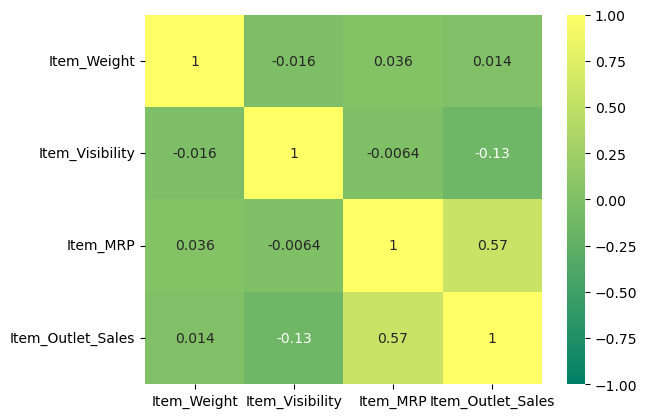

In [321]:
sns.heatmap(combined.loc[:, num_cols].corr(), annot = True,
            cmap = "summer",vmax=1,vmin=-1)

In [322]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [323]:
combined.loc[combined.Item_Identifier=="DRC01", "Item_Weight"]

1        5.92
2272     5.92
2927      NaN
5029     5.92
5077     5.92
5218     5.92
9453     5.92
10588    5.92
12787    5.92
Name: Item_Weight, dtype: float64

In [324]:
# Item Weight and Sales...

combined.Item_Weight.isnull().sum()

2439

In [325]:
combined.loc[combined.Item_Weight.isnull()].head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.12747,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636


In [326]:
combined.loc[7, "Item_Weight"] =combined.loc[combined.Item_Identifier=="FDP10", "Item_Weight"].median()

In [327]:
# Lambda - very straight forward approach

combined["Item_Weight"] = combined.groupby("Item_Identifier")["Item_Weight"].apply(lambda x:x.fillna(x.median()))

In [328]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Item_Outlet_Sales    5681
dtype: int64

In [329]:
# Treating Item Visiblity

In [330]:
combined["Item_Visibility"] = combined.groupby("Item_Identifier")\
["Item_Visibility"].apply(lambda x:x.replace(to_replace = 0, 
                                             value = x.median()))

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

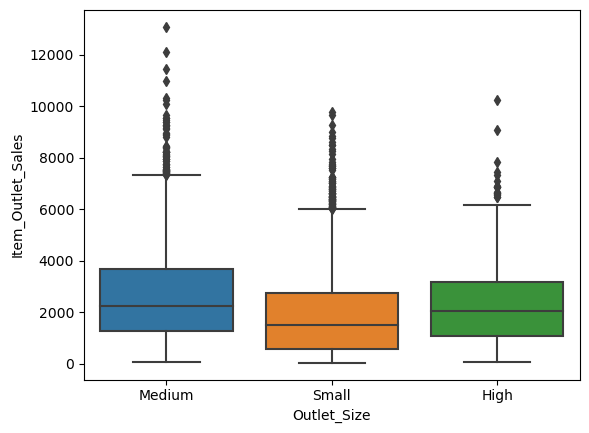

In [331]:
sns.boxplot(data = combined, x = "Outlet_Size", 
           y = "Item_Outlet_Sales")

### Feature Engineering

* Bin the Item Identifier and Item Type

Note: The Purpose of creating new features and binning is to make sure that the machine is able to capture the pattern well. This concept is known as Generalization.

In [332]:
combined.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [333]:
# Extract the First Two Letters from Item ID
ids = []

for i in combined.Item_Identifier:
    ids.append(i[:2])

In [334]:
combined["Item_IDS"] = pd.Series(ids)

#### Steps that I Follow

* Univariate
* Biv
* Feature Engineering - Most Important Step..
* Missing Values
* Outlier Analysis and Removal - This is the step where I split the data in train and test back again.
* Scaling and Transformation
* Categorical Encoding

**Why I split the Data in Train and Test Before Outliers??**
* You remove the Outliers from training data only and not from test.
* Train - that dataset on which the model will get trained
* Test - is that dataset on which the model will **predict**.


<AxesSubplot:xlabel='Item_IDS', ylabel='Item_Outlet_Sales'>

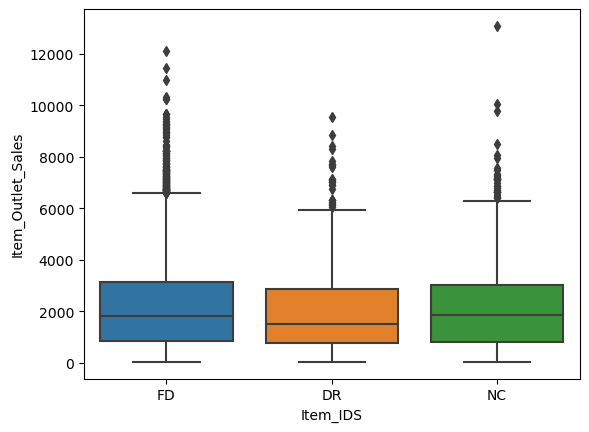

In [335]:
# Pattern of Item ID vs Sales
sns.boxplot(data = combined, x='Item_IDS', y = 'Item_Outlet_Sales')

In [336]:
combined.columns
combined.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [337]:
combined.loc[combined.Item_IDS=="NC",['Item_Type']].value_counts()

Item_Type         
Household             1548
Health and Hygiene     858
Others                 280
dtype: int64

In [338]:
# Where it is NC, we put Non Edible in Item Fat Content instead of low fat

combined.loc[combined.Item_IDS=="NC", "Item_Fat_Content"]="Non_Edible"


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

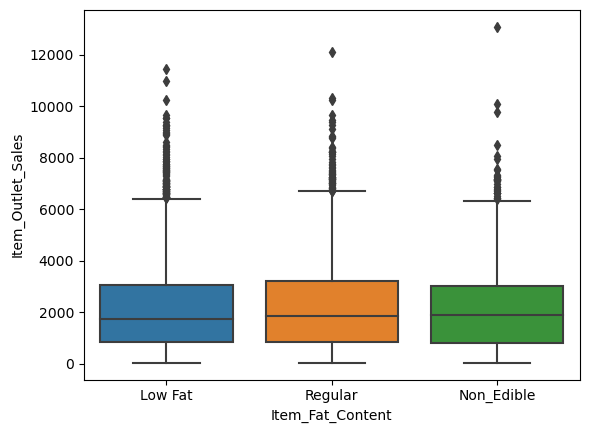

In [339]:
sns.boxplot(data = combined, x='Item_Fat_Content', 
            y = 'Item_Outlet_Sales')

In [340]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_IDS
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,FDX07,19.20,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD
4,NCD19,8.93,Non_Edible,0.013177,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC


In [341]:
combined.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [342]:
perishables = ['Dairy', 'Meat', 'Fruits and Vegetables',
       'Breakfast', 'Breads', 'Starchy Foods', 'Seafood']

non_perishables = ['Soft Drinks', 'Baking Goods', 
                   'Snack Foods', 'Frozen Foods','Hard Drinks', 'Canned']

In [343]:
def perish(x):
    if x in perishables:
        return("Perishables")
    elif x in non_perishables:
        return("Non_Perishables")
    else:
        return("Non_Eateries")

In [344]:
combined["Item_Type"] = combined.Item_Type.apply(perish)

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

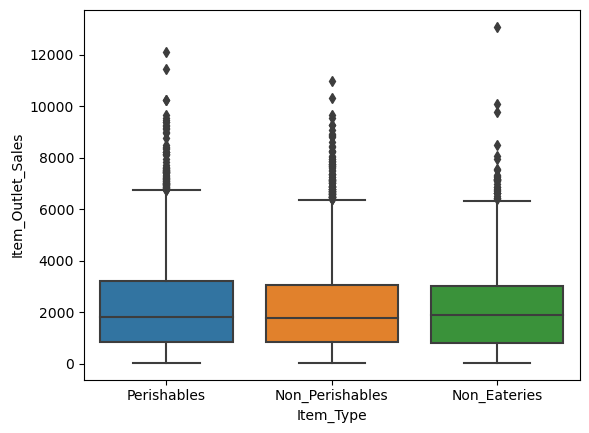

In [345]:
sns.boxplot(data = combined, x='Item_Type', 
            y = 'Item_Outlet_Sales')

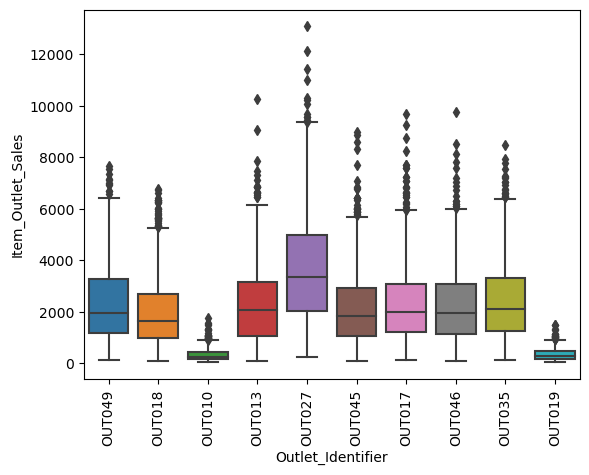

In [346]:
# Outlet Identifier
sns.boxplot(data = combined, x='Outlet_Identifier', 
            y = 'Item_Outlet_Sales')
plt.xticks(rotation = 90)
plt.show()

# Top Performers, Avg Performers, Bad Performers


In [347]:
combined.groupby("Outlet_Identifier")["Item_Outlet_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Identifier,,,,,,,,
OUT010,555.0,339.351662,271.014855,33.2900,154.13270,250.3408,455.40720,1775.6886
OUT013,932.0,2298.995256,1533.531664,73.2380,1072.60380,2050.6640,3166.37835,10256.6490
OUT017,926.0,2340.675263,1550.778025,143.8128,1195.94325,2005.0567,3096.46935,9664.7528
OUT018,928.0,1995.498739,1375.932889,69.2432,981.55565,1655.1788,2702.64865,6768.5228
OUT019,528.0,340.329723,249.979449,33.9558,153.63335,265.3213,460.73360,1482.0708
OUT027,935.0,3694.038558,2127.760054,241.6854,2044.33890,3364.9532,4975.52340,13086.9648
OUT035,930.0,2438.841866,1538.512533,113.8518,1238.88735,2109.2544,3310.35760,8479.6288
OUT045,929.0,2192.384798,1462.399658,99.8700,1068.60900,1834.9448,2929.52000,8994.9580
OUT046,930.0,2277.844267,1488.405631,101.8674,1137.18640,1945.8005,3095.63710,9779.9362


In [348]:
# Top - 27, 13 and 46, Low - 10 and 19
top = ['OUT013', "OUT027", "OUT046"]
low = ['OUT010', "OUT019"]

In [349]:
def outliers(x):
    if x in top:
        return("Top_Perf")
    elif x in low:
        return("Low_Perf")
    else:
        return("Avg_Perf")

In [350]:
combined["Outlets"] = combined.Outlet_Identifier.apply(outliers)

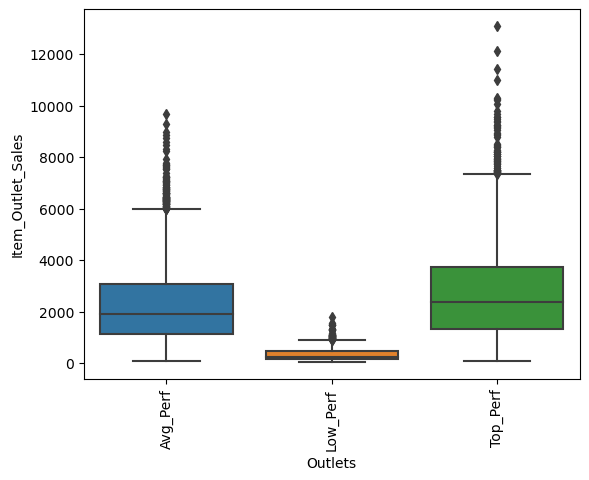

In [351]:
sns.boxplot(data = combined, x='Outlets', 
            y = 'Item_Outlet_Sales')
plt.xticks(rotation = 90)
plt.show()

In [352]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_IDS,Outlets
0,FDA15,9.30,Low Fat,0.016047,Perishables,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Avg_Perf
1,DRC01,5.92,Regular,0.019278,Non_Perishables,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Avg_Perf
2,FDN15,17.50,Low Fat,0.016760,Perishables,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Avg_Perf
3,FDX07,19.20,Regular,0.022914,Perishables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,Low_Perf
4,NCD19,8.93,Non_Edible,0.013177,Non_Eateries,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Top_Perf


In [353]:
# Vintage of the Outlet...
combined["Vintage"] = 2013 - combined.Outlet_Establishment_Year

In [354]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_IDS,Outlets,Vintage
0,FDA15,9.30,Low Fat,0.016047,Perishables,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Avg_Perf,14
1,DRC01,5.92,Regular,0.019278,Non_Perishables,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Avg_Perf,4
2,FDN15,17.50,Low Fat,0.016760,Perishables,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Avg_Perf,14
3,FDX07,19.20,Regular,0.022914,Perishables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,Low_Perf,15
4,NCD19,8.93,Non_Edible,0.013177,Non_Eateries,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Top_Perf,26


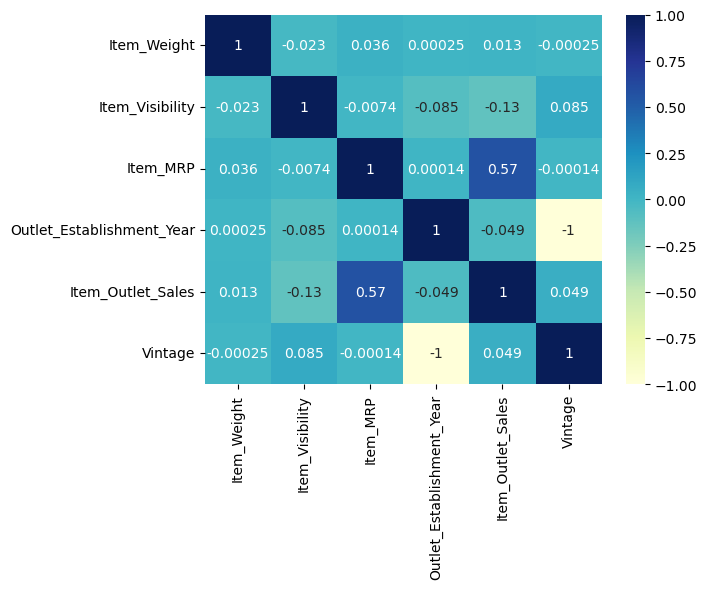

In [355]:
# Correlation plot
sns.heatmap(combined.corr(), annot = True, cmap = "YlGnBu")
plt.show()

In [356]:
# Quantity
combined["Price_Per_Unit"] = combined.Item_MRP/combined.Item_Weight

<AxesSubplot:xlabel='Price_Per_Unit', ylabel='Item_Outlet_Sales'>

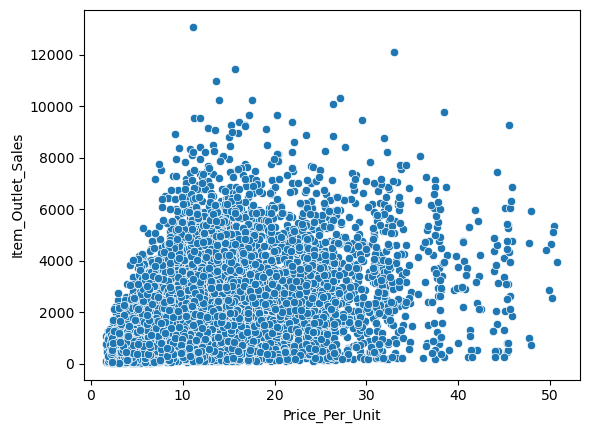

In [357]:
sns.scatterplot(data = combined, x = "Price_Per_Unit", 
                y = "Item_Outlet_Sales")

In [358]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_IDS,Outlets,Vintage,Price_Per_Unit
0,FDA15,9.30,Low Fat,0.016047,Perishables,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Avg_Perf,14,26.861204
1,DRC01,5.92,Regular,0.019278,Non_Perishables,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Avg_Perf,4,8.153581
2,FDN15,17.50,Low Fat,0.016760,Perishables,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Avg_Perf,14,8.092457
3,FDX07,19.20,Regular,0.022914,Perishables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,Low_Perf,15,9.484115
4,NCD19,8.93,Non_Edible,0.013177,Non_Eateries,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Top_Perf,26,6.031512


In [359]:
# Drop the Unnecessary Columns
combined.drop(["Item_Identifier", "Outlet_Identifier",
              "Outlet_Establishment_Year"], axis = 1, inplace = True)

In [360]:
pd.set_option('display.max_columns', 50)
pd.get_dummies(combined, drop_first = True).shape

(14204, 21)

### Outliers Analysis

Here at this stage, we will split the data in Train and Test.

``The No of Columns/Features in the Test Set is always n-1 where n is the total no of columns in the Train Set.``

* Train set is the data from where the model will learn the pattern because it has predictors and the target variable.

* Test is the data where we will do the prediction and check the performance of the model...


#### Rule of Identifying the Outliers

* Any value **greater than (Q3 + 1.5 * IQR)** is known as Outlier. This is called **Upper Outlier**

* Similary, Any value **less than (Q1 - 1.5 * IQR)** is known as **Lower Outlier**

In [361]:
# Splitting the Data back in train and test....

train.shape, test.shape, combined.shape

((8523, 12), (5681, 11), (14204, 13))

In [362]:
newtrain = combined.loc[0:train.shape[0]-1, ]
newtest = combined.loc[train.shape[0]:, ]

In [363]:
newtrain.shape, newtest.shape

((8523, 13), (5681, 13))

<AxesSubplot:xlabel='Item_Outlet_Sales'>

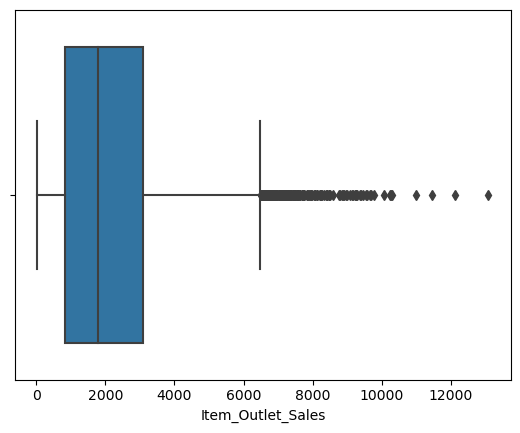

In [364]:
# See the Outlier
sns.boxplot(data = newtrain, x = "Item_Outlet_Sales")

In [365]:
# Lets Frame the Rules
q3 = newtrain.quantile(0.75)
q1 = newtrain.quantile(0.25)

# Inter Quartile Range
IQR = q3 - q1

# Upper Outlier Cut off
upper = q3 + 1.5*IQR

# Lower Outlier Cut off
lower = q1 - 1.5*IQR

In [366]:
# Lets Remove the Outliers from the Train Dataset only....

# .any(axis = 1) represents that the condition should be checked for all
# the rows and wherever the condition is met, it should produce the data...

wt_outliers = newtrain.loc[~((newtrain>upper) | \
                             (newtrain<lower)).any(axis = 1)]

In [367]:
newtrain.shape[0]-wt_outliers.shape[0]

642

<AxesSubplot:xlabel='Item_Outlet_Sales'>

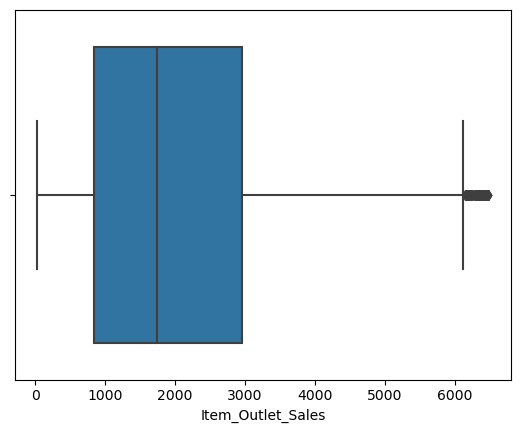

In [368]:
sns.boxplot(data = wt_outliers, x = "Item_Outlet_Sales")

### Scaling post Outliers

In [369]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [370]:
wt_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7881 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           7881 non-null   float64
 1   Item_Fat_Content      7881 non-null   object 
 2   Item_Visibility       7881 non-null   float64
 3   Item_Type             7881 non-null   object 
 4   Item_MRP              7881 non-null   float64
 5   Outlet_Size           7881 non-null   object 
 6   Outlet_Location_Type  7881 non-null   object 
 7   Outlet_Type           7881 non-null   object 
 8   Item_Outlet_Sales     7881 non-null   float64
 9   Item_IDS              7881 non-null   object 
 10  Outlets               7881 non-null   object 
 11  Vintage               7881 non-null   int64  
 12  Price_Per_Unit        7881 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 862.0+ KB


In [371]:
wt_outliers.select_dtypes(include='number').columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Vintage', 'Price_Per_Unit'],
      dtype='object')

In [372]:
# Applying it in Train and Test Together

nums = ['Item_Weight', 'Item_Visibility', 
        'Item_MRP','Price_Per_Unit']

for i in nums:
    # Scaling the Train Features
    wt_outliers.loc[:, i] = sc.fit_transform(pd.DataFrame\
                                             (wt_outliers.loc[:, i]))    
    # Scale the Test Set Features.
    newtest.loc[:,i] = sc.transform(pd.DataFrame(newtest.loc[:, i]))

In [373]:
wt_outliers.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_IDS,Outlets,Vintage,Price_Per_Unit
0,-0.846213,Low Fat,-1.147039,Perishables,1.904940,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Avg_Perf,14,2.378215
1,-1.590385,Regular,-1.075117,Non_Perishables,-1.458698,Medium,Tier 3,Supermarket Type2,443.4228,DR,Avg_Perf,4,-0.537666


### Outliers Using Z Score 

* Generally the Z Score is applied on the Target variable...

#### Empirical Rule

* 68.3% Data lies within +/- 1 S.D.
* 95.44% Data lies within +/- 2 S.D.
* 99.7% Data lies within +/- 3 S.D.

In [374]:
# Find the Z Score of the Target variable....

from scipy.stats import zscore

newtrain["z_scaled"] = zscore(newtrain.Item_Outlet_Sales)

In [375]:
newtrain["z_scaled"]

0       0.910601
1      -1.018440
2      -0.049238
3      -0.849103
4      -0.695373
          ...   
8518    0.349915
8519   -0.956402
8520   -0.579100
8521   -0.196725
8522   -0.829594
Name: z_scaled, Length: 8523, dtype: float64

In [376]:
newtrain.head(1)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_IDS,Outlets,Vintage,Price_Per_Unit,z_scaled
0,9.3,Low Fat,0.016047,Perishables,249.8092,Medium,Tier 1,Supermarket Type1,3735.138,FD,Avg_Perf,14,26.861204,0.910601


In [377]:
# Condition is: Any value greater than  or less than +/-3 Sigma/Zscore is
# An Outlier...

newtrain.loc[np.abs(newtrain.z_scaled)>3].shape # Outlier Data

(90, 14)

In [378]:
# Data After Outliers Removal....
newtrain.loc[np.abs(newtrain.z_scaled)<=3].shape

(8433, 14)

In [379]:
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [380]:
# Finding the Mean Sales of Outlets
mean_sales = train.groupby("Outlet_Identifier")["Item_Outlet_Sales"].mean().to_dict()
mean_sales

{'OUT010': 339.351661981982,
 'OUT013': 2298.995255579399,
 'OUT017': 2340.67526349892,
 'OUT018': 1995.498739224138,
 'OUT019': 340.3297227272727,
 'OUT027': 3694.0385576470585,
 'OUT035': 2438.841866021505,
 'OUT045': 2192.384797631862,
 'OUT046': 2277.8442668817206,
 'OUT049': 2348.3546346236562}

In [381]:
# Target Encoding of Outlets
train["Outlet_Mean_Sales"] = train.Outlet_Identifier.map(mean_sales)

In [382]:
# Encoding Test Set basis Target variable...

test["Outlet_Mean_Sales"] = test.Outlet_Identifier.map(mean_sales)

In [383]:
mean_sales

{'OUT010': 339.351661981982,
 'OUT013': 2298.995255579399,
 'OUT017': 2340.67526349892,
 'OUT018': 1995.498739224138,
 'OUT019': 340.3297227272727,
 'OUT027': 3694.0385576470585,
 'OUT035': 2438.841866021505,
 'OUT045': 2192.384797631862,
 'OUT046': 2277.8442668817206,
 'OUT049': 2348.3546346236562}

In [384]:
train["Outlet_Sales_Std"] = train.groupby("Outlet_Identifier")["Item_Outlet_Sales"].transform("std")

train["Outlet_Sales_Median"] = train.groupby("Outlet_Identifier")["Item_Outlet_Sales"].transform("median")

<AxesSubplot:>

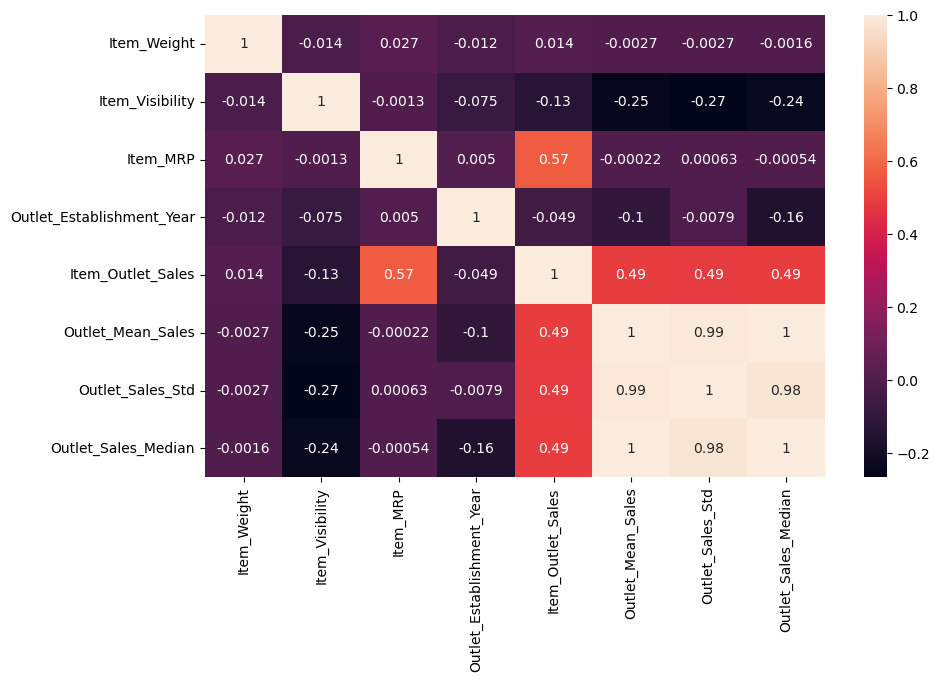

In [385]:
plt.figure(figsize = (10, 6))
sns.heatmap(train.corr(), annot = True)

In [386]:
wt_outliers.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_IDS,Outlets,Vintage,Price_Per_Unit
0,-0.846213,Low Fat,-1.147039,Perishables,1.904940,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Avg_Perf,14,2.378215
1,-1.590385,Regular,-1.075117,Non_Perishables,-1.458698,Medium,Tier 3,Supermarket Type2,443.4228,DR,Avg_Perf,4,-0.537666
2,0.959175,Low Fat,-1.131172,Perishables,0.099263,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Avg_Perf,14,-0.547193
3,1.333462,Regular,-0.994171,Perishables,0.774812,Small,Tier 3,Grocery Store,732.3800,FD,Low_Perf,15,-0.330281
4,-0.927676,Non_Edible,-1.210936,Non_Eateries,-1.365366,High,Tier 3,Supermarket Type1,994.7052,NC,Top_Perf,26,-0.868424


In [387]:
wt_outliers.Outlet_Size.unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [388]:
# dictionary to map the Outlet Size....

dict_size = {"Medium":3, "Small":2, "High":1}
wt_outliers["Outlet_Size"] = wt_outliers["Outlet_Size"].map(dict_size)

In [389]:
newtest["Outlet_Size"] = newtest["Outlet_Size"].map(dict_size)

In [390]:
# Frequency Encoding on Outlet Type
#train.Item_Type.value_counts(normalize = True).to_dict()

In [391]:
# One Hot Encoding....

dummytrain = pd.get_dummies(wt_outliers, drop_first = True)
dummytest = pd.get_dummies(newtest, drop_first = True)

In [392]:
dummytrain.shape, dummytest.shape

((7881, 20), (5681, 20))

In [393]:
# remove target from dummytest
dummytest.drop("Item_Outlet_Sales", axis = 1, inplace = True)

### Modelling

* Simple Model 

* CV Model

# SIMPLE MODEL

In [394]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = dummytrain.drop('Item_Outlet_Sales', axis = 1)
y = dummytrain.Item_Outlet_Sales 

xtrain,xtest,ytrain,ytest= train_test_split(X,y,test_size=0.2,random_state=0)

In [414]:
lr= LinearRegression()
prediction= lr.fit(xtrain,ytrain).predict(xtest)

In [413]:
y.shape

(7881,)

In [416]:
from sklearn.metrics import mean_squared_error

print(np.sqrt(mean_squared_error(ytest,prediction)))

988.3927854284395


# CV MODEL

In [136]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

## Initiate the Model 

lr = LinearRegression()

# Split the Data in X and y 

X = dummytrain.drop('Item_Outlet_Sales', axis = 1)
y = dummytrain.Item_Outlet_Sales 

## Define the K-Fold

kfold = KFold(n_splits = 5, shuffle = True , random_state = 0 )

In [137]:
## Deploy the KFold Model 
pred = []
for train_index , test_index in kfold.split(X , y):
    xtrain = X.iloc[train_index] ## Creating X train
    ytrain = y.iloc[train_index] ## Creating Y train
    
    pred.append(lr.fit(xtrain , ytrain).predict(dummytest))

In [138]:
pd.DataFrame(pred).T.mean(axis = 1) 

0       1797.215435
1       1613.033732
2       1805.408712
3       2531.506388
4       4682.510395
           ...     
5676    2250.688805
5677    2413.257916
5678    1894.979192
5679    3404.767899
5680    1376.294185
Length: 5681, dtype: float64

In [139]:
final = pd.DataFrame(pred).T.mean(axis = 1)

In [140]:
# Submission File

submission = pd.DataFrame({"Item_Identifier":test.Item_Identifier,
                          "Outlet_Identifier":test.Outlet_Identifier,
                          "Item_Outlet_Sales": np.abs(final)})

submission.head(2)

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1797.215435
1,FDW14,OUT017,1613.033732


In [141]:
## Submission

submission.to_csv("LR_5CV.csv", index = False) # RMSE : 1211

In [142]:
cd

C:\Users\Dell


### Here , RMSE of 1211 dollars mean that the predicted sales vs actual sales can have a deviation of 1200 dollars. It means that if I build another forecasting model , the predicted sales can be +/- 1200 dollars.

In [143]:
dummytrain.Item_Outlet_Sales.mean()

2045.1116960284326

In [144]:
## Random Forest Model 

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth = 5)

kfold = KFold(n_splits = 5 , shuffle= True , random_state=1)

# Build the CV Model 

pred = []

for train_index , test_index in kfold.split(X,y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred.append(rf.fit(xtrain ,ytrain).predict(dummytest))


In [145]:
final = pd.DataFrame(pred).T.mean(axis = 1 )

In [146]:
submission = pd.DataFrame({"Item_Identifier":test.Item_Identifier,
                          "Outlet_Identifier":test.Outlet_Identifier,
                          "Item_Outlet_Sales": np.abs(final)})

submission.head(2)

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1612.503877
1,FDW14,OUT017,1441.931617


In [147]:
# Export the submission file as csv file

submission.to_csv("LR_6CV.csv", index = False)

In [148]:
# below code helps to get the location of the file
cd  # RMSE: 1211

NameError: name 'cd' is not defined

### Here, RMSE of 1211 dollars mean that the predicted sales vs actual sales can have a deviation of 1200 dollars. It means that if i build another forecasting model, the predicted sales can be +/- 1200 dollars

### Recursive Feature Elimination Technique 

* Estimator = Model()

* Step = no. of features to be removed after each iteration 

* CV = Cross Validation  Step 

* Scoring = Scoring Criteria

### What is the difference between SFS and RFE

* SFS has the property of giving the best features without providing any number of Fratures.

* The selection or elimination criteria is dependent on the scoring metric.

* Whereas in RFE, the feature is totally dependant on the Feature Ranking which can be similar to calculating Feature Importance using Random Forest Model.

* In RFE, the model will give weightage to those features that have significant impact in predicting Y variables. Thus, only features that carry high weighatge are included as the final set of predictors where in the rest of the features are discarded or not considered.

* Another difference is **n_features_to_select = None** which is that there is no option in RFE to optimised the best set of features. Either, it can be 50% features or I as an analyst have to provide the optimal number of features.

In [149]:
from sklearn.feature_selection import RFE 

rf = RandomForestRegressor(max_depth=5) 
rfecv = RFE(estimator= rf , n_features_to_select=None )

<AxesSubplot:>

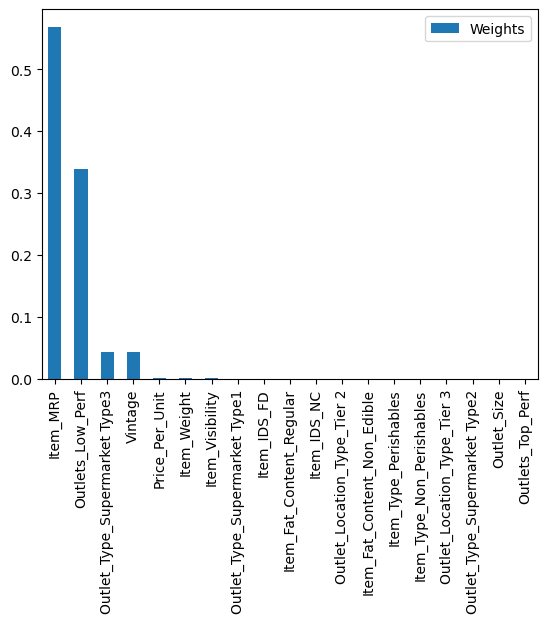

In [150]:
## Checking Feature Importance using Random Forest 

pd.DataFrame(rf.fit(X , y ).feature_importances_,
            index=X.columns , columns = ['Weights']).\
sort_values(by = 'Weights' , ascending = False).plot(kind = 'bar')

In [151]:
dummytest.isnull().sum()

Item_Weight                      0
Item_Visibility                  0
Item_MRP                         0
Outlet_Size                      0
Vintage                          0
Price_Per_Unit                   0
Item_Fat_Content_Non_Edible      0
Item_Fat_Content_Regular         0
Item_Type_Non_Perishables        0
Item_Type_Perishables            0
Outlet_Location_Type_Tier 2      0
Outlet_Location_Type_Tier 3      0
Outlet_Type_Supermarket Type1    0
Outlet_Type_Supermarket Type2    0
Outlet_Type_Supermarket Type3    0
Item_IDS_FD                      0
Item_IDS_NC                      0
Outlets_Low_Perf                 0
Outlets_Top_Perf                 0
dtype: int64

In [152]:
# SGD Regressor

from sklearn.linear_model import SGDRegressor

sgd= SGDRegressor()

sgd.fit(X,y).predict(test)

ValueError: could not convert string to float: 'FDW58'

# End to End Model Building

### Exploratory Data Analysis Steps....

* Univarate Analysis - Single Variable Analysis (Num: Histograms/Distplot| Cat: Countplot or Frequency Plot)

* Bivariate Analysis/Multivariate Analysis 
    * (Num vs Target(Num): Scatterplot & also Heatmap(Correlation Plot), 
    * Cat vs Num(Target): **Boxplot**/ViolinPlot/Barplot, 
    * Cat vs Cat (Target): Crosstab/Frequency - Countplot/Heatmap

* Missing Values & Imputation - We are going to deal with the missing values...
     * If it is a Numerical Var: Use Mean/Median Imputation
     *  Categorical Var - Frequency....
     
* Outlier Analysis & Treatment
    * Box plot technique ( IQR technique)
    * 3 Sigma Outlier method using Zscore

* **Feature Engineering**
    * We try to find out new features basis the Existing Features
    * Objective - This ensures that machine is able to generalise, remove noise and can learn pattern easily.

* Encoding and Scaling...Standard Scaler or Min Max Scaler for Scaling and for Categorical Encoding - One Hot Encoding, Label Encoding, Target Encoding and Frequency Encoding...

Note : If there are Outleirs and one cannot remove them, we can apply ** RObust-Scaler** method for scaling the data.

Remeber that the last step in EDA is scaling and/or transformation and it is known as Data Preprocessing Stage.



### Modelling

* First model is your base model. The base model in regression problems is Average. We build this model and calculate the cost function (RMSE).  (Here error will be highest coz best fit line will be y_bar). In Classification , the base model is predicting 0. (eg- nobody survived in titanic)

* We start building our Linear regression model in case of Regression & Logistic regression model in case of classification.


Note : All the models we create should be using Cross validation. Remember that the Dataset is Train and test

### Regularization
 
* Regularization involves penalizing the weak predictor and giving correct weightage  to the strong predictor

**What is theproblem  we are solving using Regularization**

* Since the model is overfitted and gives weightage to the weak predictor. Thus, we intoduce the Regularization Technique to control Overfitting.

**How does it works**

* It will introduce a bias in the model and yhe equation for the said Model under Ridge regression would be **SSE + alpha*(Sum of coffecient_Weights)^2**

**What really happens is we introduce Bias to control the Variance**


**The model which can control your Bias and variance together**

 **1.** Random Forest
 
 **2.** Gradient Boosting
 
 **3.** Xtreme Gradient Boosting
 
 **4.** Light Gradient Boosting

<AxesSubplot:>

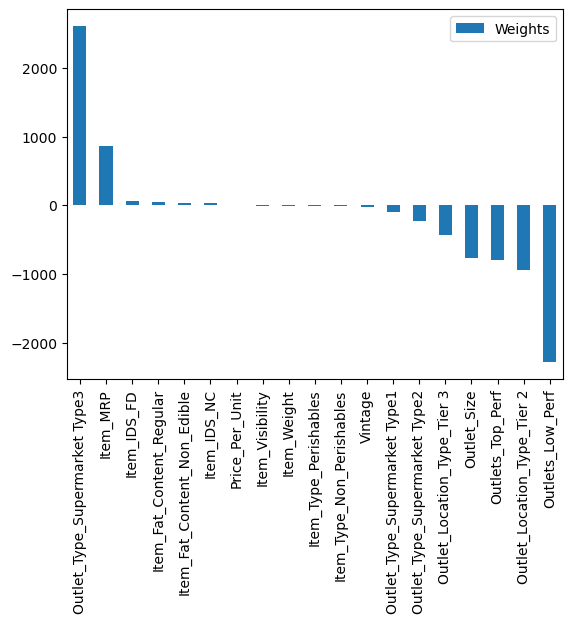

In [189]:
# plot the dataframe

pd.DataFrame(lr.coef_,lr.feature_names_in_,columns=['Weights']).sort_values(by = ['Weights'],ascending  = False).plot(kind='bar')

# some features are getting low weightage and some are getting high weightage

## Linear regression and regularization 

In [154]:
from sklearn.model_selection import KFold

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet

from sklearn.metrics import mean_squared_error

In [155]:
# RMSE
def rmse(x,y):
    return(np.sqrt(mean_squared_error(x,y)))

# Lets initiate the models

lr= LinearRegression()
ridge= Ridge(alpha = 0.05, normalize = True) # normalize helps to scale the data where mean 0 and std 1
lasso= Lasso(alpha = 0.05, normalize = True)
enet= ElasticNet(alpha = 0.05, normalize = True)

# Kfold

kfold= KFold(n_splits=5, shuffle=True, random_state=42)

In [156]:
# Fit the models

for train_index,test_index in kfold.split(X,y):
    # train index represents the trainig set
    # test_index represents the testing index
    # print(train_index,test_index)
    # we willl train xtrain,xtest,ytrain,ytest
    xtrain= X.iloc[train_index]
    ytrain= y.iloc[train_index]
    xtest= X.iloc[test_index]  # Validation Set
    ytest= y.iloc[test_index]
    
    # Model
    yhat= lr.fit(xtrain,ytrain).predict(xtest)
    print('RMSE:',rmse(ytest,yhat))
    #print(yhat)


RMSE: 1017.4484599855259
RMSE: 972.3245077420954
RMSE: 928.8525667105135
RMSE: 1015.0212406365671
RMSE: 998.7760259788984


In [157]:
yhat

array([1000.86376967, 1001.70965648,  747.65272937, ..., 3308.39373315,
       2955.41048277, 3100.25061117])

In [158]:
# lets visulaize the coefficients

coeff = pd.DataFrame(lr.coef_,index=lr.feature_names_in_,columns=['Weights'])

<AxesSubplot:>

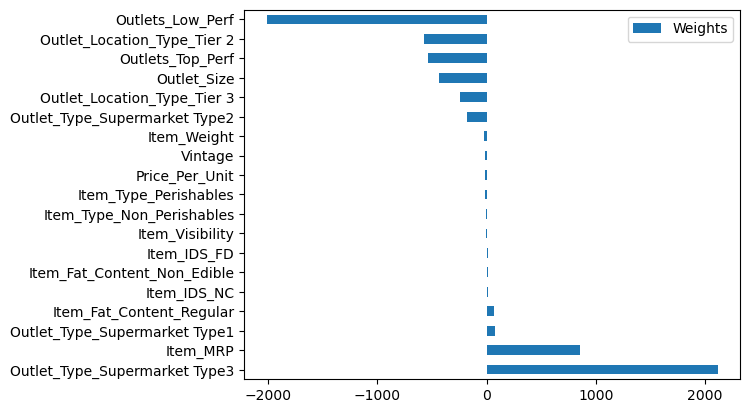

In [159]:
coeff.sort_values(by = ['Weights'],ascending=False).plot(kind = 'barh')

# Bias Variance Trade off

* As per regularization model, we are increasing bias to reduce the variance(overfitting)

* So, when in a model bias to reduce variance or increase varinace to reduce bias, such relationship is called bias varinace


In [160]:
# Fit the models

ridge= Ridge(alpha=50)

for train_index,test_index in kfold.split(X,y):
    # train index represents the trainig set
    # test_index represents the testing index
#     print(train_index,test_index)
    # we willl train xtrain,xtest,ytrain,ytest
    xtrain= X.iloc[train_index]
    ytrain= y.iloc[train_index]
    xtest= X.iloc[test_index]  # Validation Set
    ytest= y.iloc[test_index]
    
    # Model
    yhat= ridge.fit(xtrain,ytrain).predict(xtest)
    print('RMSE:',rmse(ytest,yhat))
#     print(yhat)

RMSE: 1019.1016155469146
RMSE: 973.000389921112
RMSE: 931.8000137903977
RMSE: 1015.2821549006745
RMSE: 1001.6594018866946


<AxesSubplot:>

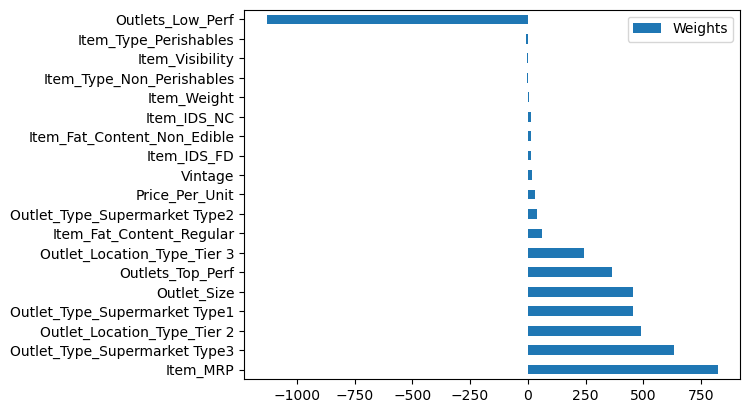

In [161]:
coeff = pd.DataFrame(ridge.coef_,index=ridge.feature_names_in_,columns=['Weights'])
coeff.sort_values(by = ['Weights'],ascending=False).plot(kind = 'barh')

In [162]:
# Fit the models

lasso= Lasso(alpha=50)

for train_index,test_index in kfold.split(X,y):
    # train index represents the trainig set
    # test_index represents the testing index
#     print(train_index,test_index)
    # we willl train xtrain,xtest,ytrain,ytest
    xtrain= X.iloc[train_index]
    ytrain= y.iloc[train_index]
    xtest= X.iloc[test_index]  # Validation Set
    ytest= y.iloc[test_index]
    
    # Model
    yhat= lasso.fit(xtrain,ytrain).predict(xtest)
    print('RMSE:',rmse(ytest,yhat))
#     print(yhat)

RMSE: 1050.8934955746079
RMSE: 996.2333795823789
RMSE: 958.6327181884253
RMSE: 1046.6308783466827
RMSE: 1026.4148567865361


<AxesSubplot:>

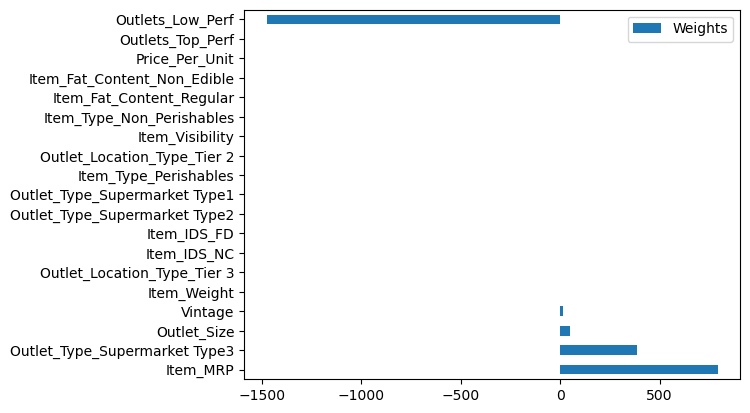

In [163]:
coeff = pd.DataFrame(lasso.coef_,index=lasso.feature_names_in_,columns=['Weights'])
coeff.sort_values(by = ['Weights'],ascending=False).plot(kind = 'barh')

In [164]:
# fit the models

enet= ElasticNet()

for train_index,test_index in kfold.split(X,y):
    # train index represents the trainig set
    # test_index represents the testing index
#     print(train_index,test_index)
    # we willl train xtrain,xtest,ytrain,ytest
    xtrain= X.iloc[train_index]
    ytrain= y.iloc[train_index]
    xtest= X.iloc[test_index]  # Validation Set
    ytest= y.iloc[test_index]
    
    # Model
    yhat= enet.fit(xtrain,ytrain).predict(xtest)
    print('RMSE:',rmse(ytest,yhat))
#     print(yhat)

RMSE: 1170.9382385057604
RMSE: 1121.845056837439
RMSE: 1075.1820195795135
RMSE: 1163.8407702616153
RMSE: 1150.2499504122595


<AxesSubplot:>

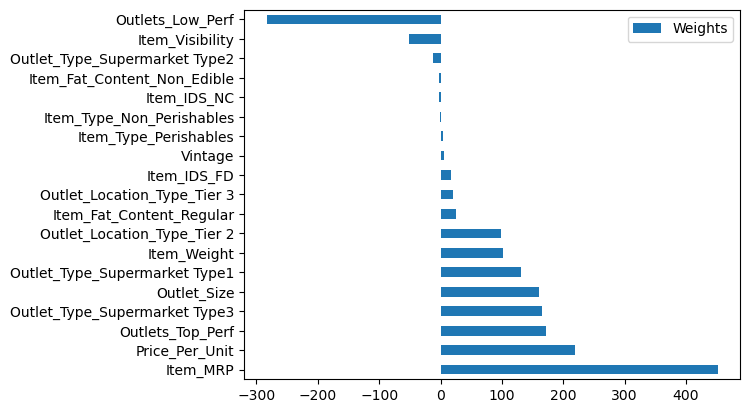

In [165]:
coeff = pd.DataFrame(enet.coef_,index=enet.feature_names_in_,columns=['Weights'])
coeff.sort_values(by = ['Weights'],ascending=False).plot(kind = 'barh')

In [248]:
a=pd.Series([1170.9382385057604,1121.845056837439,1075.1820195795135,1163.8407702616153,1150.2499504122595])

In [249]:
np.mean(a)

1136.4112071193176

In [250]:
from sklearn.model_selection import GridSearchCV

params= {'l1_ratio':[0.1,0.12,0.2,0.5,0.65,0.7,0.75,0.95]}

grid= GridSearchCV(estimator=enet, param_grid=params, scoring=rmse, cv=5)

In [252]:
# fit the model
grid.fit(X,y)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'l1_ratio': [0.1, 0.12, 0.2, 0.5, 0.65, 0.7, 0.75,
                                      0.95]},
             scoring=<function rmse at 0x000001B82A9038B0>)

In [253]:
grid.best_params_

{'l1_ratio': 0.1}

In [254]:
# fit the models

enet= ElasticNet(l1_ratio=0.1)

for train_index,test_index in kfold.split(X,y):
    # train index represents the trainig set
    # test_index represents the testing index
#     print(train_index,test_index)
    # we willl train xtrain,xtest,ytrain,ytest
    xtrain= X.iloc[train_index]
    ytrain= y.iloc[train_index]
    xtest= X.iloc[test_index]  # Validation Set
    ytest= y.iloc[test_index]
    
    # Model
    yhat= enet.fit(xtrain,ytrain).predict(xtest)
    print('RMSE:',rmse(ytest,yhat))
#     print(yhat)

RMSE: 1228.8257594404845
RMSE: 1180.013392937052
RMSE: 1131.15964980164
RMSE: 1218.0153591101896
RMSE: 1208.119566470094
